Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [7]:
NAME = "Yue Liu"
COLLABORATORS = ""

---

# Final Project Math 1MP3 SIR Models

Submit your project as a Jupyter notebook file called `yourmacid_project.ipynb`, where `yourmacid` is replaced with your MacID from your McMaster email address. (For example: since my McMaster email address is pocucan@mcmaster.ca, I would submit a file called `pocucan_project.ipynb`.) Submit this file to the appropriate MacDrive link by **June 16th 11:59pm**

To complete your project, edit the function definitions in this template (then rename the file appropriately, as above). (Don't forget to use appropriate `return()` statements in your functions!) **Do not alter any other part of this template.**

While developing and testing your code, it might be helpful to use
`print` statements, but please remove them before submitting your solution. 
You should make sure you use`return`, instead of `print` to actually return things out of a function.  
The template contains several `assert` statements that when executed will test your code.

Any file submitted for grading that does not conform to the specifications above will lead to a grade of zero on the assignment.

Before submitting your solution, you should make sure that it runs properly. To do this, you can open it in the Jupyter notebook server that comes installed with Anaconda, or you can use the McMaster Jupyter server, by going to the website https://mcmaster.syzygy.ca/. (Try running `Kernel > Restart & Aun all` from the menu to run all of your code from scratch and make sure nothing is left out.) Feel free to use the Spyder IDE, or some other IDE, to develop your code before entering it into the Jupyter notebook that you submit.

Your grade for each question will depend on whether or not your code correctly handles not just the test cases provided in the template, but other test cases that will be run on your solutions.

Do not leave this project until the last minute; last-minute computer/internet issues on your part are your problem, not ours ...

Late project will be penalized 25% per day.

All work submitted for grading must be your own. You may discuss homework problems and related material with other students, but you must not submit work copied from others or from the internet.  If you use any internet resources for help, you **must** list them as comments (#) in your answer. 

# Modelling Death with COVID 19

So far, the SIR models I have showed you do not account for the situations where you would die from the corona virus. Using the following differential equations, we will use Euler's method to analyze the number of deaths. Let $S$ denote the susceptible population, $I$ denote the infected, $R$ the recovered, and $D$ for dead. 

Use the following differential equations 

$$  \frac{ \partial S}{\partial t} = -\rho S I  $$
$\quad$
$$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I - \eta I $$
$\quad$
$$ \frac{ \partial D}{\partial t} = \eta I  $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I $$

and model 100 days using Euler's method. Note that the recovery rate $\gamma$ is the greek symbol called gamma, the death rate $\eta$ is the greek symbol called eta, the infection rate $\rho$ is rho.

In [120]:
# run these cells to load this package
import numpy as np 
import matplotlib.pyplot as pyplot

In [121]:
def create_t():
    """A function that returns 1000 evenly spaced points between 0, and 100"""
    t = np.linspace(0,100,1000)
    return(t)

In [122]:
# test cell

Next please create all of the differential equation functions in the following cell:  

In [123]:
def dS_dt(rho,t_i,S_i,I_i):
    """Differential equation for Susceptible Population, takes in 
    rho -> infection rate, float
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = -rho*S_i*I_i
    return(result)

In [124]:
def dI_dt(rho,gamma,eta,t_i,S_i,I_i):
    """Differential equation for Infected Population, takes in 
    rho -> infection rate, float
    gamma -> recovery rate, float 
    eta -> death rate, float 
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = rho*S_i*I_i - gamma*I_i - eta*I_i
    return(result)

In [125]:
def dD_dt(eta,t_i,I_i):
    """Differential equation for Death Population, takes in 
    eta -> death rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = eta*I_i
    return(result)

In [126]:
def dR_dt(gamma,t_i,I_i):
    """Differential equation for Recovered Population, takes in 
    gamma -> recovery rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = gamma*I_i
    return(result)

In [127]:
# hidden tests beware!

In [128]:
# hidden tests beware!

In [129]:
# hidden tests beware!

In [130]:
# hidden tests beware!

Now that we have all our differential equations ready to go, we need to implement 
eulers method with our `model_pandemic` function. This function takes in the `S_o,I_o`, intial populations. These are the number of susceptible and infected. Note that these are either integer or float values. These must be greater than 0.

Finally, this function must return `S`,`I`,`R`, and `D` populations as `np.array` types.

If the number of Infected People is 0 at any point in time, then this function must break and return the corresponding values. 

If there is no one left to die, then this function must break and return the corresponding values. 

If there is no one left to recover, then this function must break and return the corresponding values. 

In [154]:
def model_pandemic(S_o,I_o):
    """ 
    Model pandemic function which uses euler's method to calculate S,I,R, and D populations.
    
    This function models up to 100 days.  *hint*. Use the create_t function
    
    The parameters have all been given to you already. 
    """
    # note for all intensive purposes, these parameters are fixed for this question, 
    # do not change this numbers or delete them. 
    rho = 0.001
    gamma = 0.05
    eta = 0.001 
    t = np.linspace(0,100,1000)
    h = t[1]-t[0]
    
    S = np.array([0])
    I = np.array([0])
    R = np.array([0])
    D = np.array([0])
    for i in range(len(t)):        
        S_new = S[i] + h* dS_dt(rho,t[i],S[i],I[i])
        I_new = I[i] + h* dI_dt(rho,gamma,eta,t[i],S[i],I[i])
        R_new = R[i] + h* dD_dt(eta,t[i],I[i])
        D_new = D[i] + h* dR_dt(gamma,t[i],I[i])
        if S_new < 1:
            S_new =0.0
        if I_new < 1:
            I_new =0.0
            
        S = np.append(S, S_new)
        I = np.append(I, I_new)
        R = np.append(R, R_new)
        D = np.append(D, D_new)
        if I_new < 1:
            break
    return (S,I,R,D)

In [155]:
# Adjust the starting values here to answer each question below. 
S,I,R,D = model_pandemic(100,10)

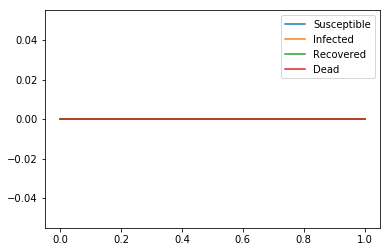

In [157]:
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

In [160]:
def question_1():
    """
    If I increase the number of starting infected cases, does the curve flatten? 
    
    answer = "Yes"
    # or 
    answer = "No"
    """
    answer = "No"
    return(answer)

In [161]:
question_1() # make sure this runs

'No'

In [162]:
def question_2():
    """
    If I have the same initial values for the infected and susceptible cases, 
    the number of dead could exceed the number of susceptible. 
    
    answer = "Yes"
    # or 
    answer = "No"
    """
    answer = "No"
    return(answer)

In [163]:
# beware of test
question_2() # make sure this compiles

'No'

In [164]:
def question_3():
    """
    For starting values S_o = 100, and I_o = 400, when does the recovered
    population approximetly exceed the susceptible population? 
    
    Note, this is an integer number. So write 
    answer = 2 if you think it should be 2. 
    
    """
    
    return(answer)

In [ ]:
# beware of test
question_3() # make sure this runs

Now that you have answered the most basic questions about the SIR models, we will now take a look at when a vaccine is in effect. 

Suppose that a vaccine is developed 25 days into the pandemic, therefore the form of the differential equations for $S$ and $R$ must change to: 




$$  \frac{ \partial S}{\partial t} = -\rho S I - \beta S * \delta(t > 25) $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I + \beta S * \delta(t > 25)$$

Here: $\beta$ is a cure rate, or the rate at which we can distribute the vaccine to the susceptible population. 

Then we have $\delta$. This is an indicator function that checks whether or not $t$ is greater than 25. If it is, this function returns 1, if it isn't this function returns 0. 

Notice how if the indicator function is 0, the cure rate portion of the model is removed, and we have the original differential equation that we had previously!


Beyond 25 days, we have the vaccine, and therefore our differential equation function changes!


We can generalize this function to have some arbitrary $v_t$ time, as in vaccine time, to symbolize the time a vaccine is found as: 



$$  \frac{ \partial S}{\partial t} = -\rho S I - \beta S * \delta(t > v_t) $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I + \beta S * \delta(t > v_t)$$



We are going to code our own indicator function `delta` that takes in float values `t_i`, `v_t`, and returns 1 or 0, based on the cutoff rate `v_t`. 

In [202]:
def delta(t_i,v_t):
    """ check to see if time t_i has exceeded v_t  """
    if t_i >= v_t:
        return 1
    if t_i < v_t:
        return 0
        return (check)

In [203]:
assert delta(50,20) == True

In [197]:
# next we need to make an adjustment to the following functions!

In [255]:
def dSV_dt(rho,beta,t_i,v_t,S_i,I_i):
    """Differential equation for Susceptible Population, takes in 
    rho -> infection rate, float
    beta -> cure rate, float 
    v_t -> vaccine time, float
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = -rho*S_i*I_i - beta*S_i*delta(t_i , v_t)  
    return(result)

In [259]:
def dRV_dt(gamma,beta,t_i,v_t,I_i,S_i):
    """Differential equation for Recovered Population, takes in 
    gamma -> recovery rate, float
    beta -> cure rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = gamma*I_i + beta*S_i*delta(t_i , v_t) 
    return(result)

In [273]:
def model_pandemic(S_o,I_o,v_t):
    """ 
    Model pandemic function which uses euler's method to calculate S,I,R, and D populations.
    
    This function models up to 100 days.  *hint*. Use the create_t function
    
    The parameters have all been given to you already. 
    
    with changed differential equations!
    """
    # note for all intensive purposes, these parameters are fixed for this question, 
    # do not change this numbers or delete them. 
    rho = 0.001 # infection rate
    gamma = 0.05 # recovery rate
    eta = 0.001 # death rate
    beta = 0.025 # cure rate
    def create_t():
        t = np.linspace(0,100,1000)
        return (t)
        
        h = t[1]-t[0]
        S = np.array([0])
        I = np.array([0])
        R = np.array([0])
        D = np.array([0])
        for i in range(len(t)):        
            S_new = S[i] + h* dSV_dt(rho,beta,t[i],v_t,S[i],I[i])
            I_new = I[i] + h* dI_dt(rho,gamma,eta,t[i],S[i],I[i])
            R_new = R[i] + h* dD_dt(eta,t[i],I[i])
            D_new = D[i] + h* dRV_dt(gamma,beta,t[i],v_t,I[i],S[i])
            #if S_new < 1:
                #S_new =0.0
            #if I_new < 1:
                #I_new =0.0

            S = np.append(S, S_new)
            I = np.append(I, I_new)
            R = np.append(R, R_new)
            D = np.append(D, D_new)
            #if I_new < 1:
               # break
    return (S,I,R,D)

In [274]:
# Adjust the starting values here to answer each question below. 
S,I,R,D = model_pandemic(100,10,25)

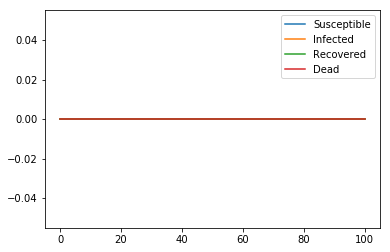

In [275]:
# plotting these results
s_t = len(S[1:]) 
pyplot.plot(create_t()[0:s_t],S[1:],label = "Susceptible")
pyplot.plot(create_t()[0:s_t],I[1:],label = "Infected")
pyplot.plot(create_t()[0:s_t],R[1:],label = "Recovered")
pyplot.plot(create_t()[0:s_t],D[1:],label = "Dead")
pyplot.legend()

In [ ]:
def question_4():
    """
    For starting values S_o = 100, and I_o = 10, and v_t = 17, 
    when does the number of recovered exceed the number of infected?
    
    Note, this is an integer number. So write 
    answer = 2 if you think it should be 2. 
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

In [ ]:
def question_5():
    """
    For starting values S_o = 100, and I_o = 10, and v_t = 37, 
    when does the number of recovered exceed the number of susceptible?
    
    Note, this is an integer number. So write 
    answer = 2 if you think it should be 2. 
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

In [ ]:
def question_6():
    """
    For starting values S_o = 100, and I_o = 10, and v_t = 37, 
    The number of susceptible at some time t, drops below the number of infected. 
    
    Note, this is a boolean. So write 
    answer = False if you think it should be False. 
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

In [ ]:
# run this cell to make sure your functions compile
question_4()
question_5()
question_6()

Now we will model the pandemic using a probabilistic system, to do this, we will 
have to change the differential equations to include random variables
Suppose our parameters are drawn from a random variable. At every step, we draw can draw
$\rho$ from an exponential distribution with rate parameter equal to $0.001$. Formally we write this as
$$\rho \sim Exp(0.001) $$

so at every step we draw a new infection rate from this distribution. We can use the 
`np.random.exp` function to do this. Lets create a function called `draw_rho` that takes in `rho` as an input and returns a random draw from this distribution. 



In [ ]:
def draw_rho(rho):
    """ Takes in a rho parameter and draws from an exponential distribution """
    
    return(result)

In [ ]:
np.random.seed(1794) # this forces the system to draw specific random numbers, 
# do not remove this line as I use it to check your work. 
# free points if it compiles 
assert draw_rho(0.001) == 0.0011446000111932104
np.random.seed() # this forces the system back to drawing random numbers normally.

Now we will create functions for $\gamma$ and $\eta$, they will all be named similarly as `draw_rho`, and will also draw from an exponential distribution. 


In [ ]:
def draw_gamma(gamma):
    # YOUR CODE HERE
    raise NotImplementedError()
    return(result)

In [ ]:
def draw_eta(eta):
    # YOUR CODE HERE
    raise NotImplementedError()
    return(result)

In [ ]:
np.random.seed(1804) # this forces the system to draw specific random numbers, 
# do not remove this line as I use it to check your work. 
# free points if it compiles 
assert draw_gamma(0.05) == 0.0372456510941877
np.random.seed() # this forces the system back to drawing random numbers normally.

In [ ]:
np.random.seed(1804) # this forces the system to draw specific random numbers, 
# do not remove this line as I use it to check your work. 
# free points if it compiles 
assert draw_eta(0.001) == 0.000744913021883754
np.random.seed() # this forces the system back to drawing random numbers normally.

So now we have the following model! 
$$\rho \sim Exp(0.001)$$
$$\gamma \sim Exp(0.05) $$
$$\eta \sim Exp(0.001) $$

$\quad$

$$  \frac{ \partial S}{\partial t} = -\rho S I  $$
$\quad$
$$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I - \eta I $$
$\quad$
$$ \frac{ \partial D}{\partial t} = \eta I  $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I $$

This means that every iteration of the for loop you must call the draw functions to draw the new parameters!. Use the `model_pandemic` function from the previous question but add the new random variable draws at every loop. 

In [ ]:
def model_pandemic(S_o,I_o):
    """ 
    Model pandemic function which uses euler's method to calculate S,I,R, and D populations.
    
    This function models up to 100 days.  *hint*. Use the create_t function
    
    The parameters have all been given to you already. 
    """
    # note for all intensive purposes, these parameters are fixed for this question, 
    # do not change this numbers or delete them. 
    rho_rate = 0.001 # this will be called in draw_rho
    gamma_rate = 0.05 # this will be called in draw_gamma
    eta_rate = 0.001  # this will be called in draw_eta at every loop
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return (S,I,R,D)

In [ ]:
S,I,R,D = model_pandemic(100,10)

In [ ]:
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

In [ ]:
# this one 
S,I,R,D = model_pandemic(100,10)
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

In [ ]:
# notice the difference between each of the plots.. they have different trajectories, 

In [ ]:
# lets plot a bunch of trajectories at once 
pyplot.plot(S,label = "Susceptible",color="blue")
pyplot.plot(I,label = "Infected",color = "orange")
pyplot.plot(R,label = "Recovered",color = "green")
pyplot.plot(D,label = "Dead",color = "red")
pyplot.legend()

for i in range(0,5):
    # run model
    S,I,R,D = model_pandemic(100,10)
    # plotting these results
    pyplot.plot(S,label = "Susceptible",color="blue")
    pyplot.plot(I,label = "Infected",color = "orange")
    pyplot.plot(R,label = "Recovered",color = "green")
    pyplot.plot(D,label = "Dead",color = "red")

In [ ]:
# note that each one of the trajectories are different,
# but follow a similar behaviour as one another

Write a function called `acquire_mean_traj` which takes in `runs` the number of runs, and returns `SM`,`IM`,`RM`,`DM`, an `np.array` types.  Where each return is the mean of the total number of runs. Note that this is not a single number, it is a `np.array` with the mean entry for each time step t across all runs!. You should use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`. 

In [ ]:
def acquire_mean_traj(runs):
    """ Get the mean trajectory across all runs"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(SM,IM,RM,DM)

In [ ]:
# get the mean trajectories of 50 runs
SM,IM,RM,DM = acquire_mean_traj(50)
# lets plot a bunch of trajectories at once 
pyplot.plot(SM,label = "Susceptible",color="blue")
pyplot.plot(IM,label = "Infected",color = "orange")
pyplot.plot(RM,label = "Recovered",color = "green")
pyplot.plot(DM,label = "Dead",color = "red")
pyplot.legend()


In [ ]:
# notice how this plot is much more smooth, and resembles a deterministic model!
# This means ... on average the behaviour of our probabilistic model is deterministic itself

Write a function called `acquire_worst_traj` which takes in `runs` the number of runs, and returns `SW`,`IW`,`RW`,`DW`, an `np.array` types.  This function calculates the highest number of infected cases for each run, and returns the trajectory with the highest infected case **among all runs**. This is the worst case scneario. You should use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`. 

In [ ]:
def acquire_worst_traj(runs):
    """ Get the worst trajectory across all runs"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(SW,IW,RW,DW)

In [ ]:
# get the worst case scenario of 50 runs
SW,IW,RW,DW = acquire_worst_traj(50)

# lets plot a bunch of trajectories at once 
pyplot.plot(SW,label = "Susceptible",color="blue")
pyplot.plot(IW,label = "Infected",color = "orange")
pyplot.plot(RW,label = "Recovered",color = "green")
pyplot.plot(DW,label = "Dead",color = "red")
pyplot.legend()



Write a function called `acquire_best_traj` which takes in `runs` the number of runs, and returns `SB`,`IB`,`RB`,`DB`, an `np.array` types.  This function calculates the highest number of infected cases for each run, and returns the trajectory with the lowest highest infected case **among all runs**. This is the best case scneario. You should use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`. Note that you should not be using `np.min` for this question!

In [ ]:
def acquire_best_traj(runs):
    """ Get the best trajectory across all runs"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(SB,IB,RB,DB)

In [ ]:
# get the best case scenario of 50 runs
SB,IB,RB,DB = acquire_best_traj(50)

pyplot.plot(SB,label = "Susceptible",color="blue")
pyplot.plot(IB,label = "Infected",color = "orange")
pyplot.plot(RB,label = "Recovered",color = "green")
pyplot.plot(DB,label = "Dead",color = "red")
pyplot.legend()


In [ ]:
# plotting everything all at once
# set the seed. 
np.random.seed(1820)
# get the mean trajectories of 50 runs
SM,IM,RM,DM = acquire_mean_traj(50)
# get the worst case scenario of 50 runs
SW,IW,RW,DW = acquire_worst_traj(50)
# get the best case scenario of 50 runs
SB,IB,RB,DB = acquire_best_traj(50)
# lets plot a bunch of trajectories at once 
pyplot.rcParams['axes.facecolor'] = 'grey'
pyplot.plot(SM,label = "Mean Susceptible",color="darkblue")
pyplot.plot(IM,label = "Mean Infected",color = "darkorange")
pyplot.plot(RM,label = "Mean Recovered",color = "darkgreen")
pyplot.plot(DM,label = "Mean Dead",color = "darkred")
pyplot.legend()
pyplot.plot(SW,label = "Worst Susceptible",color="lightblue")
pyplot.plot(IW,label = "WorstInfected",color = "yellow")
pyplot.plot(RW,label = "Worst Recovered",color = "lightgreen")
pyplot.plot(DW,label = "Worst Dead",color = "red")
pyplot.plot(SB,label = "Best Susceptible",color="blue")
pyplot.plot(IB,label = "Best Infected",color = "orange")
pyplot.plot(RB,label = "Best Recovered",color = "green")
pyplot.plot(DB,label = "Best Dead",color = "red")
np.random.seed()


In [ ]:
# note the difference between the worst case and best scenarios. 

This part of the project will require True/False answer based on the plot above. 

In [ ]:
def final_question_1():
    """The worst case scenario also has a higher population through the 100 days"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

def final_question_2():
    """The mean infected population can not be higher than the worst case infected scenario"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

def final_question_3():
    """The dead populations are roughly the same irregardless of which scenario (worst,best,mean) 
    we are in"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

def final_question_4():
    """ Worst case scenarios always have a higher infected population throughout time"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

def final_question_5():
    """ Worst case scenario has a higher infection rate overall"""
    # YOUR CODE HERE
    raise NotImplementedError()
    return(answer)

In [ ]:
# hidden tests beware

In [ ]:
# hidden tests beware

In [ ]:
# hidden tests beware

In [ ]:
# hidden tests beware

In [ ]:
# hidden tests beware